<a href="https://colab.research.google.com/github/wooihaw/ERA3036_T2310/blob/main/Tutorial_3/Tutorial_3_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
# Determine the environment
is_colab = 'google.colab' in sys.modules
# # Load the dataset conditionally
if is_colab:
    # Code for Google Colab environment
    df = read_csv("https://raw.githubusercontent.com/wooihaw/ERA3036_T2310/main/data/genders_heights_weights.csv")
else:
    # Code for local Jupyter Notebook environment
    df = read_csv("../data/genders_heights_weights.csv")
'''

Theory of using the spot-checking technique to compare multiple classification models  https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/
1. Load Dataset

In [ ]:
# load the dataset, returns X and y elements
def load_dataset():
    X, y = None, None
    return X, y

2. Define Models

In [ ]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # ...
    return models

3. Evaluate Models

In [ ]:
# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

Evaluate a single model

In [ ]:
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

In [ ]:
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric)
    except:
        scores = None
    return scores

Evaluate a dictionary of models

In [ ]:
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        scores = robust_evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results

Summarize Results

In [ ]:
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    pyplot.boxplot(scores, labels=names)
    _, labels = pyplot.xticks()
    pyplot.setp(labels, rotation=90)
    pyplot.savefig('spotcheck.png')

Spot-checking for Classification: An example

As a classification problem, we will try a suite of classification algorithms, specifically:  
**Linear Algorithms**  
Logistic Regression  
Ridge Regression  
Stochastic Gradient Descent Classifier  
Passive Aggressive Classifier  
I tried LDA and QDA, but they sadly crashed down in the C-code somewhere.  
**Nonlinear Algorithms**  
k-Nearest Neighbors  
Classification and Regression Trees  
Extra Tree  
Support Vector Machine  
Naive Bayes  
**Ensemble Algorithms**  
AdaBoost  
Bagged Decision Trees  
Random Forest  
Extra Trees  
Gradient Boosting Machine  
Further, I added multiple configurations for a few of the algorithms like Ridge, kNN, and SVM in order to give them a good chance on the problem.

Defined 53 models
>logistic: 0.848 (+/-0.034)
>ridge-0.1: 0.845 (+/-0.038)
>ridge-0.2: 0.845 (+/-0.038)
>ridge-0.3: 0.845 (+/-0.038)
>ridge-0.4: 0.845 (+/-0.038)
>ridge-0.5: 0.845 (+/-0.038)
>ridge-0.6: 0.845 (+/-0.038)
>ridge-0.7: 0.846 (+/-0.039)
>ridge-0.8: 0.847 (+/-0.039)
>ridge-0.9: 0.847 (+/-0.039)
>ridge-1.0: 0.847 (+/-0.039)
>sgd: 0.804 (+/-0.049)
>pa: 0.775 (+/-0.110)
>knn-1: 0.726 (+/-0.040)
>knn-2: 0.688 (+/-0.026)
>knn-3: 0.741 (+/-0.036)
>knn-4: 0.726 (+/-0.027)
>knn-5: 0.768 (+/-0.035)
>knn-6: 0.755 (+/-0.028)
>knn-7: 0.769 (+/-0.038)
>knn-8: 0.761 (+/-0.045)
>knn-9: 0.772 (+/-0.042)
>knn-10: 0.765 (+/-0.040)
>knn-11: 0.781 (+/-0.043)
>knn-12: 0.780 (+/-0.045)
>knn-13: 0.789 (+/-0.036)
>knn-14: 0.788 (+/-0.036)
>knn-15: 0.800 (+/-0.045)
>knn-16: 0.791 (+/-0.039)
>knn-17: 0.799 (+/-0.027)
>knn-18: 0.796 (+/-0.031)
>knn-19: 0.799 (+/-0.033)
>knn-20: 0.801 (+/-0.035)
>cart: 0.800 (+/-0.046)
>extra: 0.726 (+/-0.053)
>svml: 0.841 (+/-0.035)
>svmp: 0.810 (+/-0.048)
>svmr0.1: 0

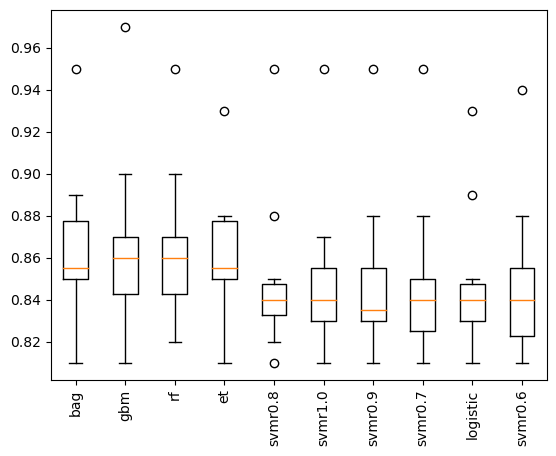

In [1]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	# pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

Spot-checking for Regression: An example

Scikit-learn does offer a wide range of linear regression methods, which is excellent. Not all of them may be required on your problem. I would recommend a minimum of linear regression and elastic net, the latter with a good suite of alpha and lambda parameters.
Nevertheless, we will test the full suite of methods on this problem, including:  
**Linear Algorithms**  
Linear Regression  
Lasso Regression  
Ridge Regression  
Elastic Net Regression  
Huber Regression  
LARS Regression  
Lasso LARS Regression  
Passive Aggressive Regression  
RANSAC Regressor  
Stochastic Gradient Descent Regression  
Theil Regression  
**Nonlinear Algorithms**  
k-Nearest Neighbors  
Classification and Regression Tree  
Extra Tree  
Support Vector Regression  
**Ensemble Algorithms**  
AdaBoost  
Bagged Decision Trees  
Random Forest  
Extra Trees  
Gradient Boosting Machines  

Defined 80 models
>lr: -0.011 (+/-0.001)
>lasso-0.0: -0.011 (+/-0.001)
>lasso-0.1: -4.756 (+/-0.808)
>lasso-0.2: -18.996 (+/-3.268)
>lasso-0.3: -42.730 (+/-7.379)
>lasso-0.4: -75.957 (+/-13.144)
>lasso-0.5: -118.679 (+/-20.561)
>lasso-0.6: -170.895 (+/-29.631)
>lasso-0.7: -232.605 (+/-40.354)
>lasso-0.8: -303.810 (+/-52.729)
>lasso-0.9: -384.509 (+/-66.757)
>lasso-1.0: -474.701 (+/-82.438)
>ridge-0.0: -0.011 (+/-0.001)
>ridge-0.1: -0.902 (+/-0.167)
>ridge-0.2: -3.534 (+/-0.668)
>ridge-0.3: -7.847 (+/-1.492)
>ridge-0.4: -13.780 (+/-2.628)
>ridge-0.5: -21.277 (+/-4.064)
>ridge-0.6: -30.283 (+/-5.788)
>ridge-0.7: -40.744 (+/-7.790)
>ridge-0.8: -52.610 (+/-10.059)
>ridge-0.9: -65.831 (+/-12.586)
>ridge-1.0: -80.359 (+/-15.361)
>en-0.0: -0.011 (+/-0.001)
>en-0.1: -14332.198 (+/-2515.878)
>en-0.2: -19687.958 (+/-3396.972)
>en-0.3: -22193.163 (+/-3800.204)
>en-0.4: -23640.200 (+/-4031.347)
>en-0.5: -24581.450 (+/-4181.446)
>en-0.6: -25242.656 (+/-4286.769)
>en-0.7: -25732.412 (+/-4364.561)
>e

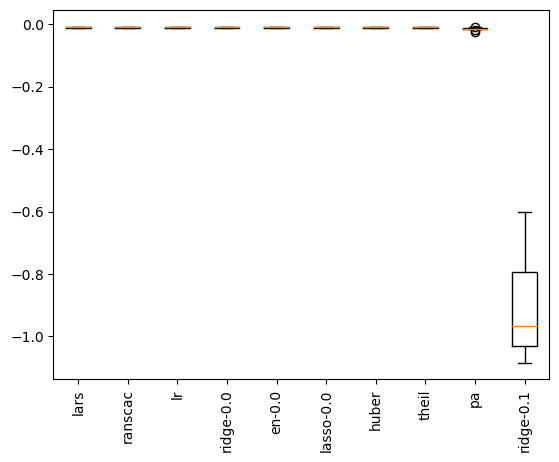

In [5]:
# regression spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# load the dataset, returns X and y elements
def load_dataset():
	return make_regression(n_samples=1000, n_features=50, noise=0.1, random_state=1)

# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
	# linear models
	models['lr'] = LinearRegression()
	alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['lasso-'+str(a)] = Lasso(alpha=a)
	for a in alpha:
		models['ridge-'+str(a)] = Ridge(alpha=a)

	'''for a1 in alpha:
		for a2 in alpha:
			name = 'en-' + str(a1) + '-' + str(a2)
			models[name] = ElasticNet(a1, a2)'''

	for a in alpha:
		name = 'en-' + str(a)
		models[name] = ElasticNet(a)

	models['huber'] = HuberRegressor()
	models['lars'] = Lars()
	models['llars'] = LassoLars()
	models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
	models['ranscac'] = RANSACRegressor()
	models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
	models['theil'] = TheilSenRegressor()
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svml'] = SVR(kernel='linear')
	models['svmp'] = SVR(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVR(C=c)
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	# pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)

### Framework Extension
In this section, we explore some handy extensions of the spot check framework.
#### Course Grid Search for Gradient Boosting
XGBoost and gradient boosting are good for straight-forward classification and regression problems.  
We can use a course grid across standard configuration parameters of the method when spot checking.  

We won't be trying to optimally tune the gradient boosting models on the problem, but only very quickly find an area in the configuration space that may be worth investigating further.

The created function can be used directly on classification and regression problems with only a minor change from “XGBClassifier” to “XGBRegressor” and “GradientBoostingClassifier” to "GradientBoostingRegressor".

In [2]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB 1.3 MB/s eta 0:01:18
                                             0.1/99.8 MB 919.0 kB/s eta 0:01:49
                                              0.1/99.8 MB 1.0 MB/s eta 0:01:37
                                             0.2/99.8 MB 952.6 kB/s eta 0:01:45
                                              0.2/99.8 MB 1.1 MB/s eta 0:01:33
                                              0.3/99.8 MB 1.1 MB/s eta 0:01:34
                                              0.3/99.8 MB 1.1 MB/s eta 0:01:35
                                              0.4/99.8 MB 1.1 MB/s eta 0:01:35
                                              0.5/99.8 MB 1.1 MB/s eta 0:01:28
                                              0.5/99.8 MB 1.2 MB/s eta 0:01:27
                                              0.6/99.8 MB 1.2 MB/s eta 0:01:25
                                              0.7/99.8 MB

Defined 53 models
Defined 107 models
>logistic: 0.848 (+/-0.034)
>ridge-0.1: 0.845 (+/-0.038)
>ridge-0.2: 0.845 (+/-0.038)
>ridge-0.3: 0.845 (+/-0.038)
>ridge-0.4: 0.845 (+/-0.038)
>ridge-0.5: 0.845 (+/-0.038)
>ridge-0.6: 0.845 (+/-0.038)
>ridge-0.7: 0.846 (+/-0.039)
>ridge-0.8: 0.847 (+/-0.039)
>ridge-0.9: 0.847 (+/-0.039)
>ridge-1.0: 0.847 (+/-0.039)
>sgd: 0.804 (+/-0.065)
>pa: 0.748 (+/-0.058)
>knn-1: 0.726 (+/-0.040)
>knn-2: 0.688 (+/-0.026)
>knn-3: 0.741 (+/-0.036)
>knn-4: 0.726 (+/-0.027)
>knn-5: 0.768 (+/-0.035)
>knn-6: 0.755 (+/-0.028)
>knn-7: 0.769 (+/-0.038)
>knn-8: 0.761 (+/-0.045)
>knn-9: 0.772 (+/-0.042)
>knn-10: 0.765 (+/-0.040)
>knn-11: 0.781 (+/-0.043)
>knn-12: 0.780 (+/-0.045)
>knn-13: 0.789 (+/-0.036)
>knn-14: 0.788 (+/-0.036)
>knn-15: 0.800 (+/-0.045)
>knn-16: 0.791 (+/-0.039)
>knn-17: 0.799 (+/-0.027)
>knn-18: 0.796 (+/-0.031)
>knn-19: 0.799 (+/-0.033)
>knn-20: 0.801 (+/-0.035)
>cart: 0.799 (+/-0.037)
>extra: 0.759 (+/-0.028)
>svml: 0.841 (+/-0.035)
>svmp: 0.810 (+/

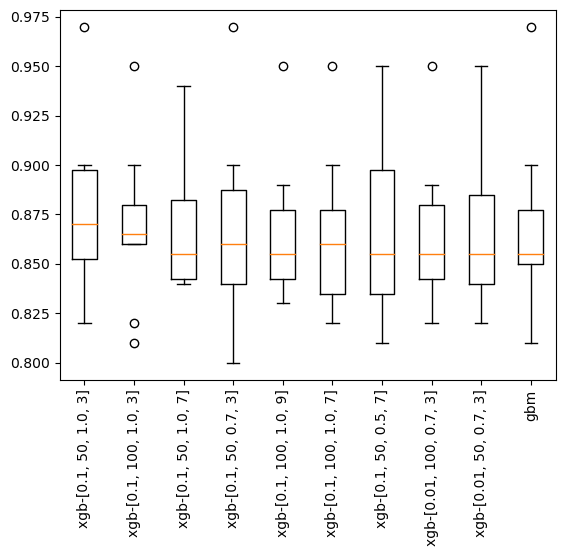

In [3]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# define gradient boosting models
def define_gbm_models(models=dict(), use_xgb=True):
	# define config ranges
	rates = [0.001, 0.01, 0.1]
	trees = [50, 100]
	ss = [0.5, 0.7, 1.0]
	depth = [3, 7, 9]
	# add configurations
	for l in rates:
		for e in trees:
			for s in ss:
				for d in depth:
					cfg = [l, e, s, d]
					if use_xgb:
						name = 'xgb-' + str(cfg)
						models[name] = XGBClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
					else:
						name = 'gbm-' + str(cfg)
						models[name] = GradientBoostingClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	# pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# add gbm models
models = define_gbm_models(models)
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

The results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.  
Running the example shows that indeed some XGBoost models perform well on the problem.

#### Repeated Evaluations
The above results also highlight the noisy nature of the evaluations, e.g. the results of extra trees in this run are different from the run above (0.858 vs 0.869).

We are using k-fold cross-validation to produce a population of scores, but the population is small and the calculated mean will be noisy.

This is fine as long as we take the spot-check results as a starting point and not definitive results of an algorithm on the problem. This is hard to do; it takes discipline in the practitioner.

Alternately, you may want to adapt the framework such that the model evaluation scheme better matches the model evaluation scheme you intend to use for your specific problem.

For example, when evaluating stochastic algorithms like bagged or boosted decision trees, it is a good idea to run each experiment multiple times on the same train/test sets (called repeats) in order to account for the stochastic nature of the learning algorithm.

We can update the *evaluate_model*() function to repeat the evaluation of a given model n-times, with a different split of the data each time, then return all scores. For example, three repeats of 10-fold cross-validation will result in 30 scores from each to calculate a mean performance of a model.

Alternately, you may prefer to calculate a mean score from each *k*-fold cross-validation run, then calculate a grand mean of all runs. We can then update the *robust_evaluate_model*() function to pass down the repeats argument and the *evaluate_models*() function to define a default, such as 3.

Defined 53 models
>logistic: 0.848 (+/-0.034)
>ridge-0.1: 0.845 (+/-0.038)
>ridge-0.2: 0.845 (+/-0.038)
>ridge-0.3: 0.845 (+/-0.038)
>ridge-0.4: 0.845 (+/-0.038)
>ridge-0.5: 0.845 (+/-0.038)
>ridge-0.6: 0.845 (+/-0.038)
>ridge-0.7: 0.846 (+/-0.039)
>ridge-0.8: 0.847 (+/-0.039)
>ridge-0.9: 0.847 (+/-0.039)
>ridge-1.0: 0.847 (+/-0.039)
>sgd: 0.815 (+/-0.059)
>pa: 0.775 (+/-0.083)
>knn-1: 0.726 (+/-0.040)
>knn-2: 0.688 (+/-0.026)
>knn-3: 0.741 (+/-0.036)
>knn-4: 0.726 (+/-0.027)
>knn-5: 0.768 (+/-0.035)
>knn-6: 0.755 (+/-0.028)
>knn-7: 0.769 (+/-0.038)
>knn-8: 0.761 (+/-0.045)
>knn-9: 0.772 (+/-0.042)
>knn-10: 0.765 (+/-0.040)
>knn-11: 0.781 (+/-0.043)
>knn-12: 0.780 (+/-0.045)
>knn-13: 0.789 (+/-0.036)
>knn-14: 0.788 (+/-0.036)
>knn-15: 0.800 (+/-0.045)
>knn-16: 0.791 (+/-0.039)
>knn-17: 0.799 (+/-0.027)
>knn-18: 0.796 (+/-0.031)
>knn-19: 0.799 (+/-0.033)
>knn-20: 0.801 (+/-0.035)
>cart: 0.795 (+/-0.039)
>extra: 0.716 (+/-0.056)
>svml: 0.841 (+/-0.035)
>svmp: 0.810 (+/-0.048)
>svmr0.1: 0

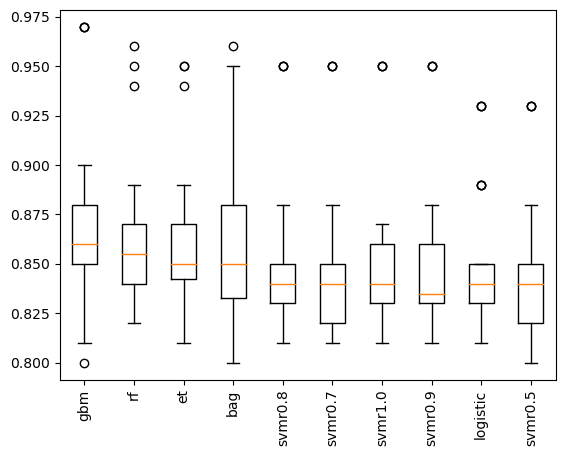

In [4]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, repeats, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = list()
	# repeat model evaluation n times
	for _ in range(repeats):
		# perform run
		scores_r = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
		# add scores to list
		scores += scores_r.tolist()
	return scores

# evaluate a model and try to trap errors and hide warnings
def robust_evaluate_model(X, y, model, folds, repeats, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, repeats, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, repeats=3, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, repeats, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	# pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

Running the example produces a more robust estimate of the scores.

There will still be some variance in the reported means, but less than a single run of *k*-fold cross-validation.

The number of repeats may be increased to further reduce this variance, at the cost of longer run times, and perhaps against the intent of spot checking.

#### Varied Input Representations
We try to avoid assumptions and recommendations for data representations prior to fitting models.

We can spot-check multiple representations and transforms of input data. We can then update the framework to spot-check multiple different representations for each model.

One way to do this is to update the *evaluate_models*() function so that we can provide a list of *make_pipeline*() functions that can be used for each defined model.

The chosen pipeline function can then be passed along down to the *robust_evaluate_model*() function and to the *evaluate_model*() function where it can be used.

We can then define a bunch of different pipeline functions, for example, one that uses the *StandardScaler*(), *MinMaxScaler*(), and one that uses both.

Then create a list of these function names that can be provided to the *evaluate_models*() function.

Defined 53 models
>0logistic: 0.844 (+/-0.043)
>1logistic: 0.844 (+/-0.043)
>2logistic: 0.848 (+/-0.034)
>3logistic: 0.848 (+/-0.034)
>0ridge-0.1: 0.845 (+/-0.038)
>1ridge-0.1: 0.845 (+/-0.038)
>2ridge-0.1: 0.845 (+/-0.038)
>3ridge-0.1: 0.845 (+/-0.038)
>0ridge-0.2: 0.845 (+/-0.038)
>1ridge-0.2: 0.845 (+/-0.038)
>2ridge-0.2: 0.845 (+/-0.038)
>3ridge-0.2: 0.845 (+/-0.038)
>0ridge-0.3: 0.845 (+/-0.038)
>1ridge-0.3: 0.845 (+/-0.038)
>2ridge-0.3: 0.845 (+/-0.038)
>3ridge-0.3: 0.845 (+/-0.038)
>0ridge-0.4: 0.845 (+/-0.038)
>1ridge-0.4: 0.845 (+/-0.038)
>2ridge-0.4: 0.845 (+/-0.038)
>3ridge-0.4: 0.845 (+/-0.038)
>0ridge-0.5: 0.845 (+/-0.038)
>1ridge-0.5: 0.845 (+/-0.038)
>2ridge-0.5: 0.845 (+/-0.038)
>3ridge-0.5: 0.845 (+/-0.038)
>0ridge-0.6: 0.845 (+/-0.038)
>1ridge-0.6: 0.845 (+/-0.038)
>2ridge-0.6: 0.845 (+/-0.038)
>3ridge-0.6: 0.845 (+/-0.038)
>0ridge-0.7: 0.845 (+/-0.038)
>1ridge-0.7: 0.845 (+/-0.038)
>2ridge-0.7: 0.846 (+/-0.039)
>3ridge-0.7: 0.846 (+/-0.039)
>0ridge-0.8: 0.845 (+/-0.0

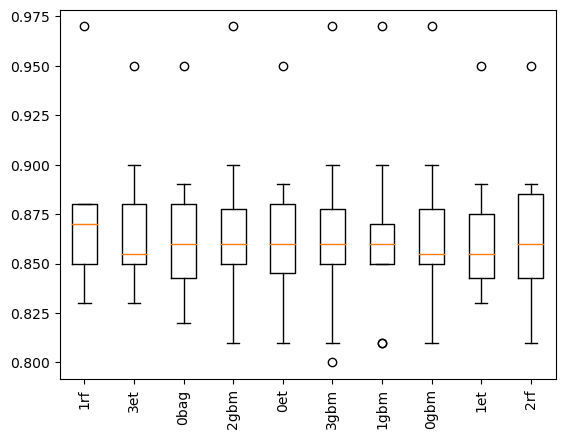

In [5]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# no transforms pipeline
def pipeline_none(model):
	return model

# standardize transform pipeline
def pipeline_standardize(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# normalize transform pipeline
def pipeline_normalize(model):
	steps = list()
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# standardize and normalize pipeline
def pipeline_std_norm(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric, pipe_func):
	# create the pipeline
	pipeline = pipe_func(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric, pipe_func):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric, pipe_func)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, pipe_funcs, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate model under each preparation function
		for i in range(len(pipe_funcs)):
			# evaluate the model
			scores = robust_evaluate_model(X, y, model, folds, metric, pipe_funcs[i])
			# update name
			run_name = str(i) + name
			# show process
			if scores is not None:
				# store a result
				results[run_name] = scores
				mean_score, std_score = mean(scores), std(scores)
				print('>%s: %.3f (+/-%.3f)' % (run_name, mean_score, std_score))
			else:
				print('>%s: error' % run_name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	# pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# define transform pipelines
pipelines = [pipeline_none, pipeline_standardize, pipeline_normalize, pipeline_std_norm]
# evaluate models
results = evaluate_models(X, y, models, pipelines)
# summarize results
summarize_results(results)

Running the example shows that we differentiate the results for each pipeline by adding the pipeline number to the beginning of the algorithm description name, e.g. ‘0rf‘ means RF with the first pipeline, which is no transforms.

The ensembles of trees algorithms perform well on this problem, and these algorithms are invariant to data scaling. This means that their results on each pipeline will be similar (or the same) and in turn they will crowd out other algorithms in the top-10 list.